# 2.1 Introducció a l'OpenCV: matriu per imatges

## Visio per Computador
La Visió per Computador (VC d'ara en endavant), és la branca de la intel·ligència artificial que s'encarrega del processament i anàlisi d'imatges, amb l'objectiu d'extreure informació de les mateixes i poder oferir solucions a problemes del món real.

El **processament d'imatges** s'encarrega de tractar les imatges i processar-les per extreure'n algun tipus d'informació. Per exemple, podem passar una imatge en color a blanc i negre per poder analitzar-la més fàcilment, podem enfosquir una imatge per remarcar aquells objectes més il.luminats, etc.
L'**anànàlisi d'imatges** utilitza la informació continguda en imatges processades per resoldre problemes del món real com, per exemple, detectar objectes concrets en una imatge.

VC s'aplica actualment a molts camps presents en el nostre dia a dia, des de control de trànsit, la seguretat en els edificis, creació i anàlisi de proves mèdiques, la robòtica, etc.

Alguns exemples reals poden ser el reconeixement de cares que veiem en Facebook, la detecció i reconeixement d'emprentes digitals per desbloquejar un mòbil, detectar somriures en temps real per fer una fotografia en una càmara digital,  extreure models 3D d'objectes, detecció d'unitats defectuoses en una cadena de muntatge, comptatge de cèl·lules sanguínies en una analítica de sang, etc. La llista podria ser llarguíssima, i cada dia s'incorporen noves solucions basades en VC.


## Sobre OpenCV
Dins la VC i machine learning, OpenCV (_Open Source Computer Vision_) és una de les llibreries de software més utilitzades arreu del món tant a nivell educatiu com privat. Una de les raons principals és que proporciona un entorn de codi obert per al desenvolupament fàcil d'utilitzar i a la vegada molt eficient pel que fa a càlcul computacional. Però també s'ha de tenir en compte que la llibreria és molt robusta (han tret només 4 versions en els seus 20 anys de la seva història) i inclou més the 2500 algoritmes optimitzats de VC and machine learning, des dels clàssics fins als més nous i innovadors.

Aquí llistems algunes de les seves característiques més rellevants:
- Llibreria de software de codi obert
- Orientada principalment a aplicacions de visió i processament de imatges en temps real
- Utilitza operacions vectorials per la majoria de les seves funcions, el que fa de l’OpenCV una llibreria molt eficient en termes de computació- Multiplataforma: suporta Linux, MacOS, Windows, iOS i Android.
- Disponible per diferents llenguatges de programació: Tot i que el motor està desenvolupat en C i C++, permet desenvolupar en C, C++, Python i Java, entre d'altres.
- Lllicència de producte BSD: OpenCV va ser creada per proporcionar i facilitar una infraestructura comuna per aplicacions de VC i per accelerar l'ús d'aquesta en productes comercials, per la qual cosa ofereix un llicència pels negocis fàcil d'utilitzar i modificar el codi.
- La llibreria s'utilitza àmpliament en empreses privades, grups de recerca i organismes governamentals: OpenCV té més de 47.000 persones en la seva comunitat d'usuaris i s'estima que el nombre de baixades supera els 18 milions.



## Introducció OpenCV
Un cop ja tenim clar que l'OpenCV és una de les llibreries que paga la pena aprendre si volem treballar amb VC, anem a fer les nostres primeres passes en aquest camp. Què necessitem primer de tot? Imatges, imatges digitals que hem de carregar d'alguna manera a l'ordinador per poder començar a treballar amb elles.


Text(0.5,1,'Lena')

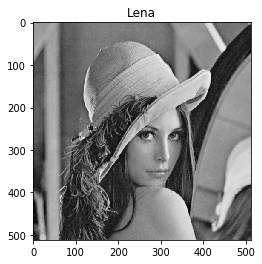

In [6]:
# EXEMPLE PRÀCTIC:

# càrrega de la llibreria OpenCV
import cv2
# càrrega de la llibreria de visualització integrada en Jupyter
from matplotlib import pyplot as plt

# lectura de la imatge de disc, forçant que sigui en blanc i negre
imatge = cv2.imread('Imatges/lena.jpg', cv2.IMREAD_GRAYSCALE)

# mostrem la imatge, indicant que volem fer servir el mapa de color de grisos
plt.imshow(imatge, cmap='gray')
plt.title('Lena')


Un cop tenim la imatge carregada en el sistema, anem a veure com podem manipular-les amb algun exemple bàsic

In [3]:
# EXEMPLE PRÀCTIC:
import cv2
from matplotlib import pyplot as plt


# com que les imatges es representen amb enters, podem modificar-les operant amb elles com si fòssin nombres
# per exemple, sumant una constant. 
imatge_aclarida = imatge - 20

# indiquem que volem fer un dibuix de dos eixos, un en vertical (primer paràmetre) 
# i dos en horitzontal (segon paràmetre). El tercer paràmetre indica que volem treballar amb el primer dibuix
plt.subplot(1,2,1)
plt.title('Lena')
plt.imshow(imatge, cmap='gray')

# aquí indiquem que volem treballar amb el segon dibuix
plt.subplot(1,2,2)
plt.title('Lena aclarida')
plt.imshow(imatge_aclarida, cmap='gray')

# un cop verifiquem que el resultat és correcte, desem el resultat a disc
cv2.imwrite('Imatges/imatge_aclarida.jpg', imatge_aclarida)


True

Ja hem fet els nostres primers passos, sabem com carregar imatges, sabem que es poden manipular o canviar, desar i visualitzar. Però, com es representa una imatge internament? Us ho avancem: amb *matrius numèriques*!

## Matrius per imatges
Les imatges digitals es representen computacionalment com matrius numèriques, on cada píxel és un element de la matriu, i el seu valor indica el color del mateix.

### Imatges binàries
Per començar amb un exemple molt bàsic, pensem amb una imatge binària o booleana, on cada píxel només pot tenir valor 0 o 1. Un element amb valor 0 indica que el píxel és de color negre, el 1 indica color blanc, Utilitzant aquesta representació, la següent imatge del gat Fèlix (a l'esquerra) tindria la seva representació matricial de 35x35 que veiem a la dreta.

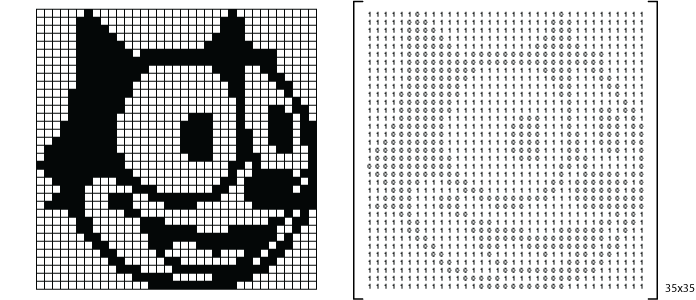

### Imatges en escala de grisos
Les imatges amb escales de grisos, segueixen la mateixa idea que les binàries però utilitzant valors dins del rang [0-255] per representar els diferents nivells de gris (0 continua sent negre, i el 255 és el blanc). Això dóna un total de 256 valors diferents. Veiem-ne un exemple.


In [4]:
#EXEMPLE PRÀCTIC: REPRESENTACIÓ IMATGE AMB ESCALA DE GRISOS

# podem veure que les imatges es representen amb una matriu 
print('Pixels de la imatge:')
print(imatge)

# i les seves dimensions
print("Mida imatge {}".format(imatge.shape))

# podem recòrrer tots els píxels de la imatge amb una iteració aniuada, recorrent files i columnes
for i in range(imatge.shape[0]):
    for j in range(imatge.shape[1]):
        # accedim a cada píxel i incrementem en 10 el seu valor
        # això seria equivalent al que hem fet en l'exercici anterior
        imatge[i,j] += 10
        


Pixels de la imatge:
[[[128 138 225]
  [127 137 224]
  [126 136 224]
  ...
  [126 145 236]
  [110 129 220]
  [ 86 104 197]]

 [[127 137 224]
  [127 137 224]
  [127 137 224]
  ...
  [130 150 235]
  [112 132 217]
  [ 83 102 189]]

 [[127 137 224]
  [127 137 224]
  [128 138 225]
  ...
  [127 148 230]
  [112 133 215]
  [ 85 105 190]]

 ...

 [[ 55  21  82]
  [ 54  20  81]
  [ 62  28  92]
  ...
  [ 82  71 175]
  [ 78  68 175]
  [ 74  65 175]]

 [[ 55  18  80]
  [ 56  19  81]
  [ 66  32  96]
  ...
  [ 82  69 177]
  [ 80  71 181]
  [ 81  72 183]]

 [[ 56  19  81]
  [ 58  21  83]
  [ 68  34  98]
  ...
  [ 81  68 176]
  [ 81  72 183]
  [ 84  74 188]]]
Mida imatge (512, 512, 3)


Aquest tipus de representació podria ser suficient per imatges web, però tingueu en compte que hi ha algunes imatges en escala de grisos que necessiten encara més resolució o detall, és a dir que necessiten més de 256 valors diferents per definir i detectar al màxim les característiques diferents. Les imatges mèdiques serien un d'aquests casos especials.

### Imatges en color
Però anem un pas més endavant, si ja fem servir 256 valors per una imatge amb escala de grisos, com representem una imatge en color? Doncs amb **3 matrius**; cada matriu especificarà el nivell de Vermell, Verd i Blau que conté cada píxel de la imatge. I cada element pot tenir 256 possibles valors dins dels rang 0-255, per indicar el nivell de cadascun dels 3 colors. Aquest sistema és conegut com **sistema RGB**, per les seves inicials en anglès dels colors vermell (Red), verd (Green) i blau (Blue), i pot arribar a representar fins a 16777216 colors diferents.

El sistema RGB és el sistema més popular per representar colors en ordinadors, però hem de tenir en compte que l'OpenCV fa servir el sistema BGR, qué ve a ser el mateix però canviant l'ordre dels colors. El per què d'aquest canvi no està clar, molta gent creu que és per una raó històrica, perquè quan es va començar a desenvolupar el codi de l'OpenCV el sistema de color en format BGR era el més popular entre els fabricants de càmeres i els proveïdors de software, per la qual cosa els desenvolupadors van escollir aquest sistema i així ha quedat fins a dia d'avui. No té gaire importància si treballem només amb OpenCV i Python, però si ho haurem de tenir en compte si fem servir software extern per visualitzar alguna imatge manipulada i/o desada amb OpenCV perquè els canals R(vermell) i B(blau) estaran intercanviats.




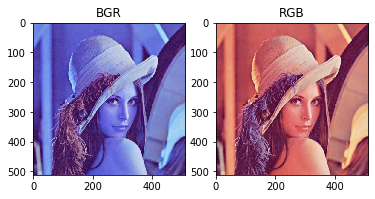

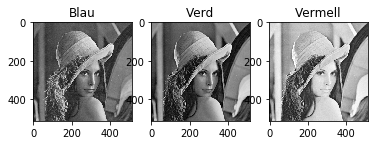

In [5]:
#EXEMPLE PRÀCTIC: VISUALITZANT SISTEMA RGB/BGR 

import cv2
from matplotlib import pyplot as plt

# per defecte, OpenCV carrega les imatges assumint que estan en ordre BGR. 
# Tanmateix, la majoria de vegades les imatges estan en ordre RGB
imatge = cv2.imread('Imatges/lena.jpg')

# Si mostrem la imatge tal i com está al disc, no es veurà correctament (el canal blau i verd estan canviats)
plt.figure()
plt.subplot(1,2,1)
plt.title('BGR')
plt.imshow(imatge)

# si invertim l'ordre dels canals, ja es veurà correctament la imatge
image_rgb = cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.title('RGB')
plt.imshow(image_rgb)

# També podem manipular cadascun dels canals de la imatge color
canal_blau = imatge[:,:, 0]
canal_verd = imatge[:,:, 1]
canal_vermell = imatge[:,:, 2]

plt.figure()
plt.subplot(1,3,1)
plt.title('Blau')
plt.imshow(canal_blau, cmap='gray')

plt.subplot(1,3,2)
plt.title('Verd')
plt.imshow(canal_verd, cmap='gray')

plt.subplot(1,3,3)
plt.title('Vermell')
plt.imshow(canal_vermell, cmap='gray')

# la imatge té un to vermellós, per això el canal vermell és més intens (blanc) que la resta


Ara que ja sabem com es desen i interpreten les imatge en color, anem a veure com passar una imatge en color a escala de grisos. Aquest, tot i que sembli estrany a primera vista, és el primer pas que haurem de fer en la majoria de processaments d'imatge. Convertir una imatge en color a blanc i negre (o a escala de grisos) ens permetrà analitzar molt millor la imatge resultant en la majoria dels casos.



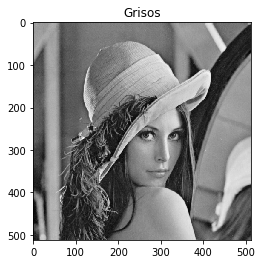

In [5]:
#EXEMPLE PRÀCTIC: CONVERTIR IMATGE EN COLOR A ESCALA DE GRISOS
imatge_grisos = cv2.cvtColor(imatge, cv2.COLOR_BGR2GRAY)

plt.title('Grisos')
plt.imshow(imatge_grisos, cmap='gray')



### Transformacions bàsiques de matrius
Les matrius ens permeten fer molts tipus d'operacions, i aquestes operacions es veuran reflectides en la imatge que representen. Per exemple, què passaria si apliquem la matriu transposta? 


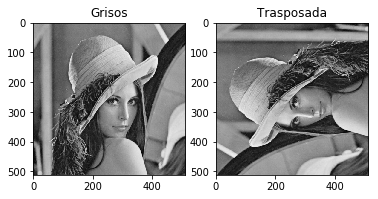

In [6]:
#EXEMPLE PRÀCTIC: 

imatge_trasposada = imatge_grisos.transpose()
plt.subplot(1,2,1)
plt.title('Grisos')
plt.imshow(imatge_grisos, cmap='gray')

plt.subplot(1,2,2)
plt.title('Trasposada')
plt.imshow(imatge_trasposada, cmap='gray')

# Per a veure diferents transformacions geomètriques, consultar:
#https://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html


## Referències
- Web oficial d'OpenCV: [https://opencv.org/](https://opencv.org/)
- Tutorial transformacions geomètriques d'imatges: [https://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html](https://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html)
- Changing the contrast and brightness of an image!: [https://docs.opencv.org/4.1.0/d3/dc1/tutorial_basic_linear_transform.html](https://docs.opencv.org/4.1.0/d3/dc1/tutorial_basic_linear_transform.html)
- La visión por computador: Una disciplina en auge. Àgata Lapedriza. UOC: [http://informatica.blogs.uoc.edu/2012/04/19/la-vision-por-computador-una-disciplina-en-auge/](http://informatica.blogs.uoc.edu/2012/04/19/la-vision-por-computador-una-disciplina-en-auge/)
- La visión por computador: aplicaciones (I). David Masip, Àgata Laprediza, Xavier Baró. UOC: [(http://informatica.blogs.uoc.edu/2013/07/18/la-vision-por-computador-aplicaciones-i/](http://informatica.blogs.uoc.edu/2013/07/18/la-vision-por-computador-aplicaciones-i/)


    